<a href="https://colab.research.google.com/github/gorselli14/Portifolio_Projetos/blob/master/Mod2_An%C3%A1lise_A%C3%A7%C3%B5es_Banco_Bradesco_BBDC4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando as ações do Banco Bradesco BBDC4 com Pandas


In [1]:
#importandp Pandas
import pandas as pd
import matplotlib.pyplot as plt


##Importanção dos dados e análise do dataset

Os dados que serão analisados abaixo, foram obtidos do site do [Yahoo Finance](https://finance.yahoo.com/quote/BBDC4.SA/history?period1=1199232000&period2=1593820800&interval=1d&filter=history&frequency=1d), considerando o intervalo entre Janeiro de 2008 e Julho de 2020.


Os dados form exportados para um arquivos CSV que foi armazenado em um repositório público do meu perfil no **GitHub**

https://github.com/gorselli14/Dados/blob/master/BBDC4.SA.csv

In [2]:
#Importando dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gorselli14/Dados/master/BBDC4.SA.csv')
print(df)

            Date       Open       High  ...      Close  Adj Close      Volume
0     2008-01-02  23.535601  23.635300  ...  22.030800  12.502825         0.0
1     2008-01-03  22.114000  22.317699  ...  21.577700  12.255054         0.0
2     2008-01-04  21.781401  21.968500  ...  21.324200  12.111085   5694095.0
3     2008-01-07  21.428101  21.993401  ...  21.719101  12.335369         0.0
4     2008-01-08  22.114000  22.525499  ...  22.051600  12.524208         0.0
...          ...        ...        ...  ...        ...        ...         ...
3098  2020-06-29  20.889999  21.410000  ...  21.410000  21.390802  49001400.0
3099  2020-06-30  21.219999  21.290001  ...  20.700001  20.681438  44894900.0
3100  2020-07-01  20.820000  21.360001  ...  21.160000  21.141026  33581400.0
3101  2020-07-02  21.620001  21.879999  ...  21.209999  21.209999  37641800.0
3102  2020-07-03  21.180000  21.389999  ...  21.350000  21.350000  12407300.0

[3103 rows x 7 columns]


In [3]:
#visualizar a dimensão do Dataframe
print(df.shape)
print(f'Quantidade de linhas {df.shape[0]}')
print(f'Quantidade de colunas {df.shape[1]}')

(3103, 7)
Quantidade de linhas 3103
Quantidade de colunas 7


In [4]:
#Ulitizando df.info() é fácil visualizar se existem informações em branco em cada coluna, além do tipo de dado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3103 non-null   object 
 1   Open       3036 non-null   float64
 2   High       3036 non-null   float64
 3   Low        3036 non-null   float64
 4   Close      3036 non-null   float64
 5   Adj Close  3036 non-null   float64
 6   Volume     3036 non-null   float64
dtypes: float64(6), object(1)
memory usage: 169.8+ KB


##Convertendo a coluna Date
Conforme mostrado no método info(), a coluna Date originalmente foi importada com o formato `object`, dessa forma não é possível utilizar essa informação adequadamente.
Convertendo essa coluna para o formato de data, será possivel realizar agrupamentos por períodos distintos.

In [5]:
#convertendo para o formato de data
#informar em qual coluna a conversão será gravada, informar qual coluna será convertida e informar o formato como a data está descrita na coluna original
df.Date = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [6]:
#agora aparece no formato de data (Dtype = datetime64[ns])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3103 non-null   datetime64[ns]
 1   Open       3036 non-null   float64       
 2   High       3036 non-null   float64       
 3   Low        3036 non-null   float64       
 4   Close      3036 non-null   float64       
 5   Adj Close  3036 non-null   float64       
 6   Volume     3036 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 169.8 KB


##Analisando os dados das ações do Banco Bradesco


Apare seguir com as análises, vou criar um novo dataframe, somente com as colunas Date, Open e Close.
Vou utilizar essas informações para calcular a variação % das ações em cada dia.

No *DataFrame* `df_clean` teremos a seguinte informação:


*   **Date**: data da negocição das ações
*   **Open**: valor das ações na abertura do mercado
*   **Close**: valor das ações no fechamento do mercado
*   **Variation %**: percentual de variação da ação no dia



In [7]:
#criando o dataframe df_clean somente com as colunas que vou utilizar
df_clean = pd.DataFrame(df, columns=['Date','Open','Close'])
#incluindo uma coluna chamada Variation % que será calculada usando a variação do valor de abertura e fechamento da ação
df_clean['Variation %'] = ((df_clean['Close']-df_clean['Open'])/df_clean['Open'])*100

In [8]:
#Resumo estatístico
df_clean.describe()

,Open,Close,Variation %
count,3036.000000,3036.000000,3036.000000
mean,18.987180,18.985268,0.018372
std,6.885379,6.877187,1.864574
min,9.687410,9.681720,-10.684574
25%,13.792075,13.798300,-1.081251
50%,16.362350,16.382200,0.000000
75%,21.412501,21.396149,1.082181
max,39.599998,39.410000,12.084560


In [13]:
print(f'Maior valor da ação desde 2008: R${df_clean["Open"].max():.2f}')
print(f'Maior variação: {df_clean["Variation %"].max():.2f}%')
print(f'Menor valor da ação desde 2008: R${df_clean["Close"].min():.2f}')
print(f'Maior variação Negativa: {df_clean["Variation %"].min():.2f}%')

Maior valor da ação desde 2008: R$39.60
Maior variação: 12.08%
Menor valor da ação desde 2008: R$9.68
Maior variação Negativa: -10.68%


Histograma do valor de fechamento das ações do Bradesco desde 2008


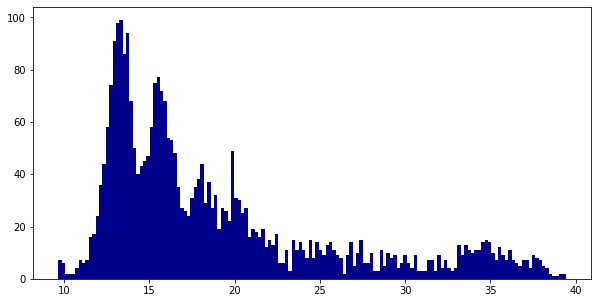

In [27]:
print('Histograma do valor de fechamento das ações do Bradesco desde 2008')
df_clean["Close"].hist(bins=150, figsize=(10,5), color='darkblue', grid=False)

Histograma do % de variação das ações do Bradesco desde 2008


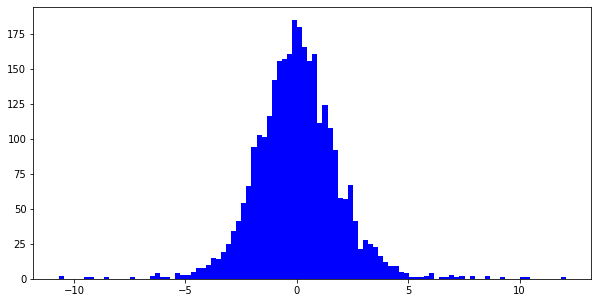

In [24]:
print('Histograma do % de variação das ações do Bradesco desde 2008')
df_clean['Variation %'].hist(bins=100, figsize=(10,5), color='Blue', grid=False)

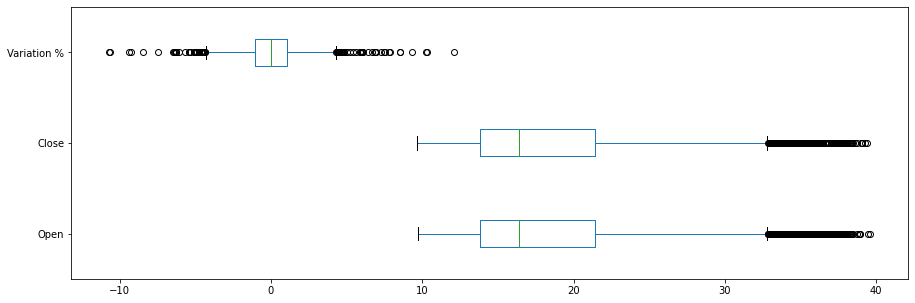

In [15]:
#BoxPlot
df_clean.plot(kind='box', vert=False, figsize=(15,5))

In [16]:
#Media dos valores diários da ação em cada ano
df_clean.groupby(df_clean["Date"].dt.year).mean()

,Open,Close,Variation %
Date,,,
2008,19.502050,19.486638,-0.008481
2009,14.362987,14.384327,0.152086
2010,16.086970,16.088749,0.008523
2011,12.985009,12.975702,-0.056044
2012,13.778741,13.798673,0.151344
2013,14.795120,14.792761,-0.009834
2014,15.835917,15.854857,0.137077
2015,15.174943,15.159930,-0.103607
2016,16.147901,16.165947,0.136957


In [23]:
print('Data da MAIOR cotação da ação do Bradesco')
df_clean.loc[df_clean["Open"].idxmax()]

Data da MAIOR cotação da ação do Bradesco


Date           2019-07-10 00:00:00
Open                          39.6
Close                        39.05
Variation %               -1.38889
Name: 2857, dtype: object

In [22]:
print('Data da MENOR cotação da ação do Bradesco')
df_clean.loc[df_clean["Close"].idxmin()]

Data da MENOR cotação da ação do Bradesco


Date           2016-01-21 00:00:00
Open                        9.7614
Close                      9.68172
Variation %              -0.816276
Name: 1993, dtype: object

In [19]:
varia = ((df_clean['Open'].max()-df_clean['Close'].min())/df_clean['Open'].max())*100
print (f'Perda de {varia:.2f}% do valor da ação, considerando o maior e o menor valor.')

Perda de 75.55% do valor da ação, considerando o maior e o menor valor.


In [21]:
print(f'Primeiro valor da ação em 2008: R${df_clean.iloc[0,1]:.2f}')
print(f'Valor atual da ação: R${df_clean.iloc[-1,2]}')

Primeiro valor da ação em 2008: R$23.54
Valor atual da ação: R$21.35
